# UTP PPM 2024
---------------
# KNN

Tuliskan Nama, NIM, dan kelas Anda:

Nama  : Dani Adrian

NIM   : 225150201111009

Kelas : PPM-E

# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dataset

Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

Link alternatif: https://drive.google.com/file/d/1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV/view

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV' -O winequality-red.csv

--2024-04-07 06:02:18--  https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV
Resolving docs.google.com (docs.google.com)... 172.253.62.138, 172.253.62.113, 172.253.62.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV&export=download [following]
--2024-04-07 06:02:18--  https://drive.usercontent.google.com/download?id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [application/octet-stream]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Data information and check for missing values
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu dilakukan imputasi atau metode penanganan nilai yang hilang lainnya.

# Pre-proses Data

Lakukan reduksi data melalui downsampling untuk memperpendek proses pelatihan dan pengujian model.

In [5]:
# Reduce the number data
def random_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=0)
reduced_data = random_sampling(data, 500)

Lakukan normalisasi data kecuali kolom quality sebagai kolom label dengan menggunakan z-score.

In [6]:
# Z-score normalization except for the quality column
def z_score(data):
    # Exclude the 'quality' column from normalization
    columns_to_normalize = data.columns[data.columns != 'quality']
    # Normalized data initialization
    normalized_data = data.copy()
    normalized_data[columns_to_normalize] = normalized_data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].mean()) / data[columns_to_normalize].std()
    return normalized_data

normalized_data = z_score(reduced_data)
normalized_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,1.478894,-0.316620,0.839736,-0.342617,2.080887,1.247433,0.721623,0.787516,-0.949976,0.669567,0.326500,6
1032,-0.090687,1.829335,-1.382061,1.340176,0.200821,-1.034963,-1.029072,0.968922,0.280060,-0.797104,-0.799686,5
1002,0.490639,-1.420254,0.323039,-0.384686,-0.590786,-0.205001,-0.591398,-0.834468,-0.367327,1.179714,1.171140,7
487,1.130098,0.756357,0.478048,-0.595036,-0.838163,-1.034963,-1.029072,0.787516,-0.949976,-1.498556,-0.424291,6
979,2.292751,-0.439246,1.149754,-0.931594,-0.293934,-1.242453,-1.298410,0.093904,-1.208930,-0.159421,-0.048895,5


# Model

Buatlah sebuah fungsi perhitungan jarak menggunakan rumus Chebyshev, Euclidean, Manhattan yang memiliki parameter data1 dan data2 dalam bentuk float, dan distance_type dalam bentuk string.

In [7]:
# Distance Function (chebyshev, euclidean, manhattan)

def chebyshev(data1, data2):
    return np.max(np.abs(data1 - data2))
def euclidean(data1, data2):
    return np.sqrt(np.sum(np.square(data1 - data2)))
def manhattan(data1, data2):
    return np.sum(np.abs(data1 - data2))


def calculate_distance(data1, data2, distance_type):
    if distance_type == 'chebyshev':
        return chebyshev(data1, data2)
    elif distance_type == 'euclidean':
        return euclidean(data1, data2)
    elif distance_type == 'manhattan':
        return manhattan(data1, data2)
    else:
        return None

Simpan label dataset yang dinormalisasi ke dalam variabel yang disebut "label".

In [8]:
label = normalized_data[normalized_data.columns[-1]]
label

1109    6
1032    5
1002    7
487     6
979     5
       ..
831     6
1437    5
620     5
465     5
748     6
Name: quality, Length: 500, dtype: int64

Bagi dataset yang dinormalisasi menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [9]:
train_data, test_data, train_label, test_label = train_test_split(normalized_data, label, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(400, 12)
(100, 12)


Buatlah sebuah fungsi algoritma KNN untuk melakukan prediksi menggunakan parameter train_data, train_label, test_data, k sebagai bilangan bulat, dan distance_type sebagai string.

In [12]:
def knn(train_data, train_label, test_data, k, distance_type):
    if distance_type == 'chebyshev':
        distance_func = chebyshev
    elif distance_type == 'euclidean':
        distance_func = euclidean
    elif distance_type == 'manhattan':
        distance_func = manhattan
    else:
        return None

    jarak = np.array([distance_func(train_data.iloc[x], test_data) for x in range(train_data.shape[0])])
    indeks_k_minimum = jarak.argsort()[:k]
    k_kelas = train_label.iloc[indeks_k_minimum].to_numpy()
    counter = Counter(k_kelas)
    predictions = counter.most_common(1)[0][0]
    return predictions

def knn_multi(train_data, train_label, test_data, k, distance_type):
    if distance_type == 'chebyshev':
        distance_func = chebyshev
    elif distance_type == 'euclidean':
        distance_func = euclidean
    elif distance_type == 'manhattan':
        distance_func = manhattan
    else:
        return None

    predictions = []
    for i in range(test_data.shape[0]):
        jarak = np.array([distance_func(train_data.iloc[x], test_data.iloc[i]) for x in range(train_data.shape[0])])
        indeks_k_minimum = jarak.argsort()[:k]
        k_kelas = train_label.iloc[indeks_k_minimum].to_numpy()
        counter = Counter(k_kelas)
        prediction = counter.most_common(1)[0][0]
        predictions.append(prediction)
    return predictions

Temukan nilai k terbaik dengan mengamati hasil akurasi untuk setiap nilai k yang berbeda dan berbagai metode perhitungan jarak yang berbeda.

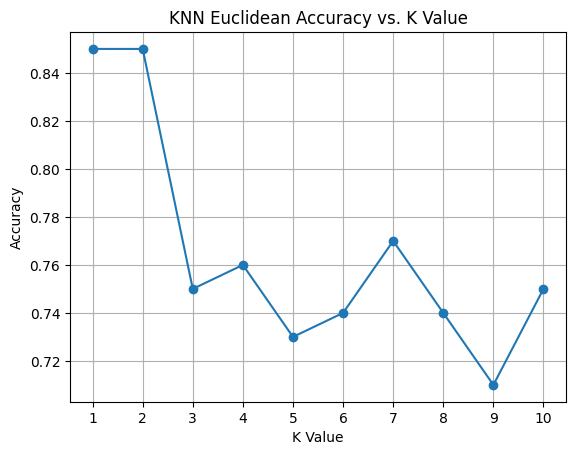

In [13]:
# Find best k for euclidean KNN

# Initialize empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test
k_range = range(1, 11)

# Iterate over each k value
for k in k_range:
    # Make predictions using the KNN model
    predictions = knn_multi(train_data, train_label, test_data, k, 'euclidean')
    # Calculate accuracy
    accuracy = accuracy_score(test_label, predictions)
    # Append k and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Euclidean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

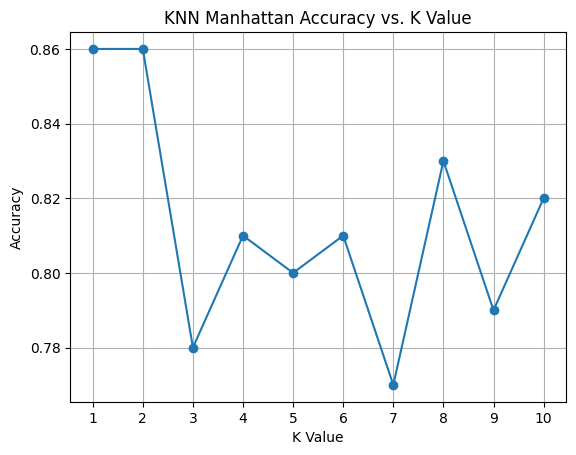

In [14]:
# Find best k for Manhattan KNN
# Initialize empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test
k_range = range(1, 11)

# Iterate over each k value
for k in k_range:
    # Make predictions using the KNN model
    predictions = knn_multi(train_data, train_label, test_data, k, 'manhattan')
    # Calculate accuracy
    accuracy = accuracy_score(test_label, predictions)
    # Append k and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Manhattan Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

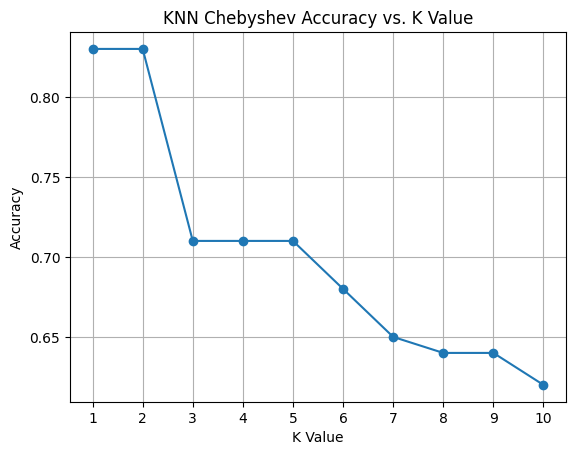

In [15]:
# Find best k for chebyshev KNN
# Initialize empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test
k_range = range(1, 11)

# Iterate over each k value
for k in k_range:
    # Make predictions using the KNN model
    predictions = knn_multi(train_data, train_label, test_data, k, 'chebyshev')
    # Calculate accuracy
    accuracy = accuracy_score(test_label, predictions)
    # Append k and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Chebyshev Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Evaluasi

Cetak hasil akurasi prediksi untuk setiap KNN dengan nilai k terbaik dan rumus perhitungan jarak yang berbeda

In [16]:
# Predict using euclidean KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, k, 'euclidean')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [17]:
# Predict using manhattan KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, k, 'manhattan')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.82


In [18]:
# Predict using chebyshev KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, k, 'chebyshev')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.62


# Kesimpulan

Soal

1. Jelaskan pengaruh k yang rendah ataupun tinggi terhadap akurasi hasil algoritma KNN!
2. Jelaskan pengaruh perbedaan rumus perhitungan jarak yang digunakan terhadap hasil akurasi algoritma KNN!
3. Jelaskan dan sebutkan berapa jumlah k ideal dan apa rumus perhitungan jarak yang menghasilkan akurasi terbaik pada praktikum ini!

Jawaban

1. Saat k rendah, contohnya k = 1, model KNN cenderung overfitting karena hanya memperhatikan tetangga terdekat dalam memprediksi label data baru. Ini membuat model terlalu responsif terhadap noise atau variasi kecil dalam data. Sebaliknya, dengan k yang tinggi, seperti k = jumlah total data, model cenderung underfitting karena mempertimbangkan terlalu banyak tetangga dalam memprediksi label, yang bisa mengaburkan pola sebenarnya dalam data dan menghasilkan performa yang buruk pada data uji.


2. Pilihan metrik jarak memengaruhi cara KNN menyesuaikan data dan menentukan kelas yang paling sesuai. Misalnya, Euclidean distance memberikan bobot yang sama pada semua dimensi, sementara Manhattan distance lebih cocok untuk data di mana perbedaan dalam satu dimensi mungkin lebih penting. Selain itu, sensitivitas terhadap outlier berbeda antara metrik jarak; Euclidean distance lebih sensitif terhadap outlier dibandingkan Manhattan dan Chebyshev distances. Perbedaan dalam komputasi metrik jarak juga mempengaruhi waktu eksekusi algoritma, terutama dalam dimensi yang tinggi.


3. KNN menentukan kelas suatu data baru berdasarkan mayoritas kelas dari k-nearest neighbors-nya. "K" dalam KNN merujuk pada jumlah tetangga terdekat yang digunakan. Dalam kasus ini, terdapat dua nilai k yang ideal, yaitu 1 dan 2. Ini berarti model KNN yang optimal menggunakan hanya satu atau dua tetangga terdekat untuk menentukan kelas suatu sampel.